# 1. Filter Method

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

df_robust = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KUBIG/23-2 KDIS 장기 프로젝트 분반/df_robust')

# Features와 Target 분리
X = df_robust.drop(columns=['Country Code', 'Year', 'Y'])
y = df_robust['Y']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

def evaluate_RFmodel(columns):
    features = df_robust[columns]
    target = df_robust['Y']

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'<Random Forest Regressor 학습 성능>\n')
    print('MAE : {:.6f}'.format(mean_absolute_error(y_test, y_pred)))
    print('MSE : {:.6f}'.format(mean_squared_error(y_test, y_pred)))
    print('R2 : {:.6f}'.format(r2_score(y_test, y_pred)))
    print('\n')

def evaluate_LRmodel(columns):
    features = df_robust[columns]
    target = df_robust['Y']

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'<Linear Regression 학습 성능>\n')
    print('MAE : {:.6f}'.format(mean_absolute_error(y_test, y_pred)))
    print('MSE : {:.6f}'.format(mean_squared_error(y_test, y_pred)))
    print('R2 : {:.6f}'.format(r2_score(y_test, y_pred)))

##  1) Pearson

*   모든 변수가 연속형이고 정규분포를 띄는 경우 사용
*   정규분포 조건에 충족하지 못하면 비모수적 상관계수(스피어만, 켄달)를 사용
*   피쳐 간 상관정도가 어느정도인지를 추론


In [ ]:
#default값은 pearson 상관계수
pearson_corr = df_robust.corr().loc[:, 'Y']

pearson_corr_order = pd.DataFrame(pearson_corr)
pearson_corr_order.reset_index(inplace=True)
pearson_corr_order.columns = ['pearson_feature', 'pearson_corr']

pearson_corr_order = pearson_corr_order.sort_values(by='pearson_corr', ascending=False)

In [ ]:
pearson_corr_order.reset_index(inplace=True, drop=True)
pearson_corr_order

,pearson_feature,pearson_corr
0,Y,1.000000
1,Military spending,0.509357
2,Gini index,0.442159
3,R&D spending,0.350681
4,Medium and high-tech exports (% manufactured e...,0.347595
5,Average wages,0.345511
6,Maternal mortality ratio,0.314911
7,Poverty rate,0.293721
8,GNI per capita,0.283155
9,High-technology exports (% of manufactured exp...,0.244812


- Military spending가 의외로 가장 상관계수 높게 나옴! (절대규모 아니고 % of GDP임)
- 빈부격차를 나타내는 지니계수도 높음(빈부격차가 심할수록 상관계수 높음)
- 농업/임업/어업 부가가치(% of GDP)는 가장 강한 음의 상관관계로, High Tech의 제조 수출 비중이 양의 상관관계를 띄는 것과 대조적

In [ ]:
# 상위 20개 칼럼들만 출력
high_corr_columns = pearson_corr_order[(pearson_corr_order['pearson_corr'].abs() >= 0.185) & (pearson_corr_order['pearson_feature'] != 'Y')]
high_corr_columns

,pearson_feature,pearson_corr
1,Military spending,0.509357
2,Gini index,0.442159
3,R&D spending,0.350681
4,Medium and high-tech exports (% manufactured e...,0.347595
5,Average wages,0.345511
6,Maternal mortality ratio,0.314911
7,Poverty rate,0.293721
8,GNI per capita,0.283155
9,High-technology exports (% of manufactured exp...,0.244812
10,Old-age dependency ratio,0.221116


In [ ]:
selected_features = high_corr_columns['pearson_feature'].tolist()

evaluate_RFmodel(selected_features)
evaluate_LRmodel(selected_features)

<Random Forest Regressor 학습 성능>

MAE : 838.869763
MSE : 2517555.241291
R2 : 0.964748


<Linear Regression 학습 성능>

MAE : 2665.677917
MSE : 14074399.044851
R2 : 0.802926


In [ ]:
pearson_top20 = selected_features

## 2) Spearman

*   연속형 변수에 대해 정규분포를 따르지 않아도 사용 가능
*   비선형 상관관계를 파악할 수 있음
*   데이터 내 편차와 에러에 민감

In [ ]:
#pearson이 아닌 spearman 상관계수를 확인. 이는 선형관계가 아닌 비선형 관계를 확인할 수 있음
Spearman_corr = df_robust.corr(method='spearman').loc[:, 'Y']

Spearman_corr_order = pd.DataFrame(Spearman_corr)
Spearman_corr_order.reset_index(inplace=True)
Spearman_corr_order.columns = ['Spearman_feature', 'Spearman_corr']

Spearman_corr_order = Spearman_corr_order.sort_values(by='Spearman_corr', ascending=False)

Spearman_corr_order.reset_index(inplace=True, drop=True)
Spearman_corr_order

,Spearman_feature,Spearman_corr
0,Y,1.000000
1,R&D spending,0.498424
2,GNI per capita,0.448806
3,Average wages,0.414828
4,Old-age dependency ratio,0.405194
5,Life expectancy at 65,0.393769
6,GDP per capita,0.392040
7,Medium and high-tech exports (% manufactured e...,0.362011
8,Life expectancy at birth,0.347642
9,Population ages 65 and above (% of total popul...,0.344812


- 마찬가지로 농업/임업/어업 부가가치(% of GDP)가 최하위
- 특이점, GDP 대비 국방비 지출 항목이 아예 상관계수 0.1로 떨어짐
- R&D spending, GNI per capita, Average wages 등 국가 경제 수준을 가늠할 수 있는 요소들이 상위에 랭크됨

In [ ]:
# 상위 20개 칼럼들만 출력
high_corr_columns2 = Spearman_corr_order[(Spearman_corr_order['Spearman_corr'].abs() >= 0.275) & (Spearman_corr_order['Spearman_feature'] != 'Y')]
high_corr_columns2

,Spearman_feature,Spearman_corr
1,R&D spending,0.498424
2,GNI per capita,0.448806
3,Average wages,0.414828
4,Old-age dependency ratio,0.405194
5,Life expectancy at 65,0.393769
6,GDP per capita,0.392040
7,Medium and high-tech exports (% manufactured e...,0.362011
8,Life expectancy at birth,0.347642
9,Population ages 65 and above (% of total popul...,0.344812
10,Business extent of disclosure index (0-10),0.340323


In [ ]:
selected_features = high_corr_columns2['Spearman_feature'].tolist()

evaluate_RFmodel(selected_features)
evaluate_LRmodel(selected_features)

<Random Forest Regressor 학습 성능>

MAE : 974.433384
MSE : 3643112.831107
R2 : 0.948988


<Linear Regression 학습 성능>

MAE : 3062.339007
MSE : 19363283.358171
R2 : 0.728870


In [ ]:
spearman_top20 = selected_features

## 3) Kendall Tau

*   연속형 변수에 대해 정규분포를 따르지 않아도 사용 가능
*   비선형 상관관계를 파악할 수 있음
*   주로 데이터가 작을 때 사용

In [ ]:
Kendall_corr = df_robust.corr(method='kendall').loc[:, 'Y']

Kendall_corr_order = pd.DataFrame(Kendall_corr)
Kendall_corr_order.reset_index(inplace=True)
Kendall_corr_order.columns = ['Kendall Tau_feature', 'Kendall Tau_corr']

Kendall_corr_order = Kendall_corr_order.sort_values(by='Kendall Tau_corr', ascending=False)

Kendall_corr_order.reset_index(inplace=True, drop=True)
Kendall_corr_order

,Kendall Tau_feature,Kendall Tau_corr
0,Y,1.000000
1,R&D spending,0.344582
2,Average wages,0.315951
3,GNI per capita,0.313635
4,Life expectancy at 65,0.283659
5,Old-age dependency ratio,0.283088
6,GDP per capita,0.273166
7,Medium and high-tech exports (% manufactured e...,0.267910
8,Life expectancy at birth,0.253241
9,Population ages 65 and above (% of total popul...,0.243014


- 스피어만 상관계수와 비슷한 결과

In [ ]:
# 상위 20개 칼럼들만 출력
high_corr_columns3 = Kendall_corr_order[(Kendall_corr_order['Kendall Tau_corr'].abs() >= 0.186) & (Kendall_corr_order['Kendall Tau_feature'] != 'Y')]
high_corr_columns3

,Kendall Tau_feature,Kendall Tau_corr
1,R&D spending,0.344582
2,Average wages,0.315951
3,GNI per capita,0.313635
4,Life expectancy at 65,0.283659
5,Old-age dependency ratio,0.283088
6,GDP per capita,0.273166
7,Medium and high-tech exports (% manufactured e...,0.267910
8,Life expectancy at birth,0.253241
9,Population ages 65 and above (% of total popul...,0.243014
10,Business extent of disclosure index (0-10),0.232524


In [ ]:
selected_features = high_corr_columns3['Kendall Tau_feature'].tolist()

evaluate_RFmodel(selected_features)
evaluate_LRmodel(selected_features)

<Random Forest Regressor 학습 성능>

MAE : 966.154106
MSE : 3790989.314119
R2 : 0.946917


<Linear Regression 학습 성능>

MAE : 3062.339007
MSE : 19363283.358171
R2 : 0.728870


In [ ]:
kendall_top20 = selected_features

## 4) feature importance

*   가지에서 몇번 등장하는지, 혹은 불순도를 얼마나 낮추는 지에 대한 지표
*   -영향(negative)을 주는 feature를 알수 없음
*   따라서 중요한 피쳐가 무엇인지를 알 수 있어도, 불필요한 피쳐를 빼는 과정에서는 도움을 받기 어려움

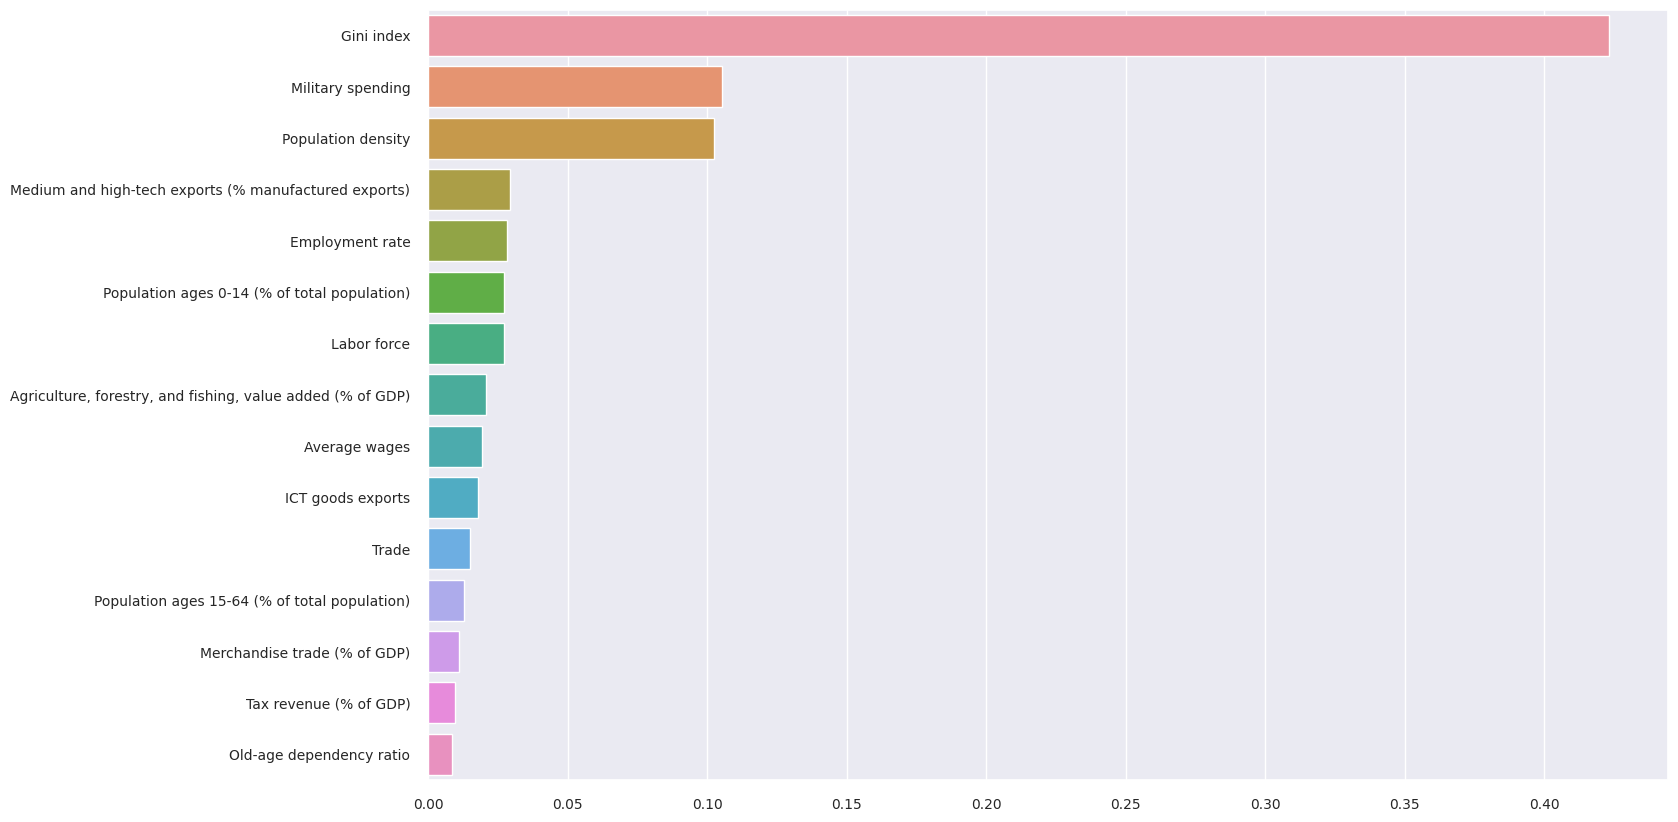

In [ ]:
train_features = df_robust.drop(columns=['Country Code', 'Year', 'Y'])
train_target = df_robust['Y']

X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=80, random_state=42)
rf.fit(X_train, y_train)

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

#높은 중요도를 가진 변수 상위 15개만 출력
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(16, 10))
sns.barplot(x=ftr_top20.values, y=ftr_top20.index)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- 여기에서도 pearson 상관계수와 유사하게, GDP % 국방비 지출, 지니계수가 가장 상위권
- 특이점 : 인구 밀도가 높은 지표가 3위
- 변수의 중요도를 나타낼 뿐, 음의 관계인지 양의 관계인지는 알 수 없음

In [ ]:
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]
top10_columns = ftr_top10.index.tolist()

print(top10_columns)

evaluate_RFmodel(top10_columns)
print('\n')
evaluate_LRmodel(top10_columns)

['Gini index', 'Military spending', 'Population density', 'Medium and high-tech exports (% manufactured exports)', 'Employment rate', 'Population ages 0-14 (% of total population)', 'Labor force', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Average wages', 'ICT goods exports']
<Random Forest Regressor 학습 성능>

MAE : 761.370705
MSE : 2161892.067387
R2 : 0.969729




<Linear Regression 학습 성능>

MAE : 3293.735772
MSE : 20171753.751138
R2 : 0.717549


- 가장 좋은 성능. 원본 데이터보다도 좋은 성능
- 근데 피쳐 임포턴스도 트리기반 모델에서 feature를 선별하는 거고, 베이스라인 모델도 Randomforest라서 당연한 결과인가 싶기도...
- 위 상관계수에서 공통적으로 들어갔던 R&D spending, Average wages, Trade, Agriculture, forestry, and fishing, value added 중에서는 Average wage와 Agriculture, forestry, and fishing, value added 두 변수만 들어감

In [ ]:
# 상위 20개 변수 저장
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
feature_importance_top20 = ftr_top20.index.tolist()

## 5) Permutation Importance
*   모델을 학습시킨 뒤, 특정 feature의 데이터를 shuffle 했을 때, 검증 데이터 셋에 대한 예측성능을 확인하고 feature importance를 계산
*   중요하지 않은 변수들은 weight가 음수 값을 나타냄
*   변수가 굉장히 많아 제거할 필요가 있는 경우 도움을 받을 수 있음

In [ ]:
!pip install 'eli5'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=b8319f4bc327b1011e0d20f297f00b9332387d4ef0f06b62171c65987206af0a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
pd.set_option('display.max_rows', None)

X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=80, random_state=42)
model.fit(X_train, y_train)

perm = PermutationImportance(model, scoring="neg_mean_absolute_error", random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, top=len(X_test.columns), feature_names=X_test.columns.tolist())

Weight,Feature
1943.3823 ± 79.1343,Gini index
1315.8166 ± 308.7741,Population density
646.7025 ± 196.6594,Average wages
394.4003 ± 95.3663,Medium and high-tech exports (% manufactured exports)
384.8538 ± 32.6350,Military spending
265.3494 ± 41.9878,"Agriculture, forestry, and fishing, value added (% of GDP)"
253.9310 ± 56.3218,Fuel exports (% of merchandise exports)
215.7244 ± 32.6421,Population ages 0-14 (% of total population)
197.4204 ± 80.2751,Labor force
184.2616 ± 22.8832,Trade


- 지니 계수, 인구밀도, 평균 임금이 상위권
- 연도별 GDP 성장률이 가장 하위권(중요하지 않음 변수)
- 인플레이션, poverty rate 등 중요할 것이라 예상했던 국가 경제 관련 지표가 하위권임

In [ ]:
# 상위 5개와 하위 5개 출력
importances = eli5.explain_weights_df(perm, feature_names=X_test.columns.tolist())

top_5_positive_features = importances.sort_values(by='weight', ascending=False).head(5)['feature'].tolist()
top_5_negative_features = importances.sort_values(by='weight', ascending=True).head(5)['feature'].tolist()

print('Top 5 positive features:', top_5_positive_features)
print('Top 5 negative features:', top_5_negative_features)

Top 5 positive features: ['Gini index', 'Population density', 'Average wages', 'Medium and high-tech exports (% manufactured exports)', 'Military spending']
Top 5 negative features: ['GDP per capita growth (annual %)', 'Inflation', 'Survival to 65_female', 'Poverty rate', 'FDI outflows']


In [ ]:
top10_features = top_5_positive_features + top_5_negative_features

evaluate_RFmodel(top10_features)
evaluate_LRmodel(top10_features)

<Random Forest Regressor 학습 성능>

MAE : 729.771075
MSE : 2494719.980942
R2 : 0.965068


<Linear Regression 학습 성능>

MAE : 3181.214183
MSE : 19579765.380078
R2 : 0.725838


In [ ]:
top10_positive_features = importances.sort_values(by='weight', ascending=False).head(10)['feature'].tolist()
top10_negative_features = importances.sort_values(by='weight', ascending=True).head(10)['feature'].tolist()

permutation_importance_top20 = top10_positive_features + top10_negative_features

## 6) 선형회귀 - OLS regression
- p-값은 변수의 통계적 유의성을 나타내며, 보통 0.05 이하일 때 해당 변수가 유의미한 영향을 미친다고 판단
- 즉 p-값이 낮을수록 높은 영향

In [ ]:
pip install --upgrade scipy statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
# 선형회귀1. OLS regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, shuffle=True, random_state=34)

# 연료 변수가 object이므로 더미화 진행 (type : 3개)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     69.77
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          8.62e-179
Time:                        07:54:34   Log-Likelihood:                -4562.7
No. Observations:                 490   AIC:                             9229.
Df Residuals:                     438   BIC:                             9447.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

-  p-value가 0.05 이하로, 통계적으로 유의하면서도 coef의 절댓값이 커 Y값에 미치는 영향이 큰 변수 상위 20개 출력
    - Survival to 65_female
    - Tax revenue (% of GDP)
    - Old-age dependency ratio
    - Survival to 65_male
    - GNI per capita
    - R&D spending
    - Average wages
    - Medium and high-tech exports (% manufactured exports)
    - Military spending
    - Population density
    - Business extent of disclosure index (0-10)
    - Urban population
    - General government spending
    - Labor force, female (% of total labor force)
    - Population growth (annual %)
    - International tourism, receipts (% of total exports)
    - Maternal mortality ratio
    - Education spending
    - Ores and metals exports (% of merchandise exports)
    - Exchange rates